# Markov Chain

Hanyan Cai

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy
import numpy as np
from scipy.stats import norm

The transition matrix under this context will be $\begin{bmatrix}
0.5 & 0.2 & 0.3\\
0.2 & 0.6 & 0.1\\
0.3 & 0.2 & 0.6\\
\end{bmatrix}$.

Now, let us put this transition matrix into code. We will set the
initial state of the system to be

to denote all three companies having equal shares of the market.

I appreciate having the explanation of what this initial state means,
right here when you first present it.

In [3]:
# Code in this transition matrix and the initial state (Equal shares of customers)
markovTransition = np.array([[0.5, 0.2, 0.3], [0.2, 0.6, 0.1], [0.3, 0.2, 0.6]])
initialState = np.array([[1/3], [1/3], [1/3]])
iteration = initialState

# Test three iterations
for i in range(3):
  iteration = markovTransition.dot(iteration)
  print(f"{i + 1} Year Later: \n Percent of customer shares for A: {np.round(iteration[0, 0] * 100, decimals=2)}% \n Percent of customer shares for B: {np.round(iteration[1, 0] * 100, decimals=2)}% \n Percent of customer shares for C: {np.round(iteration[2, 0] * 100, decimals=2)}%")

1 Year Later: 
 Percent of customer shares for A: 33.33% 
 Percent of customer shares for B: 30.0% 
 Percent of customer shares for C: 36.67%
2 Year Later: 
 Percent of customer shares for A: 33.67% 
 Percent of customer shares for B: 28.33% 
 Percent of customer shares for C: 38.0%
3 Year Later: 
 Percent of customer shares for A: 33.9% 
 Percent of customer shares for B: 27.53% 
 Percent of customer shares for C: 38.57%

We can see from the results that B begins to lose shares of the market,
C gains a considerable amount of shares (around 2%), while A gains small
amount of shares (around 0.6%) in three years.

Now, let us test the effects of the two advertising campaigns.

Advertising Campaign 1 convinces 20% of customers who would have to stay
in B to switch to A. This can be represented in the modified transition
matrix: $\begin{bmatrix}
0.5 & 0.32 & 0.3\\
0.2 & 0.48 & 0.1\\
0.3 & 0.2 & 0.6\\
\end{bmatrix}$.

Advertising Campaign 2 convinces 20% of customers who would have to stay
in C to switch to A. This can be represented in the modified transition
matrix: $\begin{bmatrix}
0.5 & 0.2 & 0.42\\
0.2 & 0.6 & 0.1\\
0.3 & 0.2 & 0.48\\
\end{bmatrix}$.

To view the effectiveness of the campaigns, I will iterate these markov
chains over times and create a Gaussian Fit.

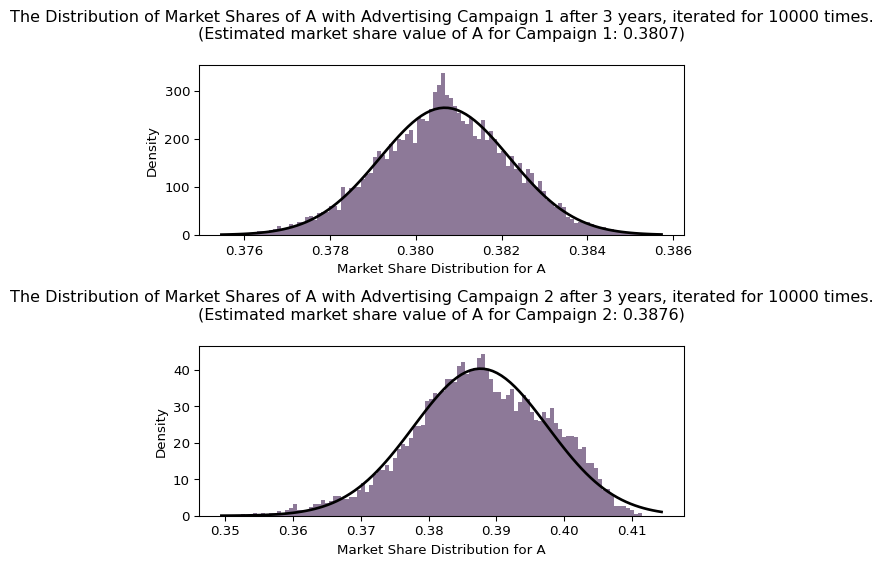

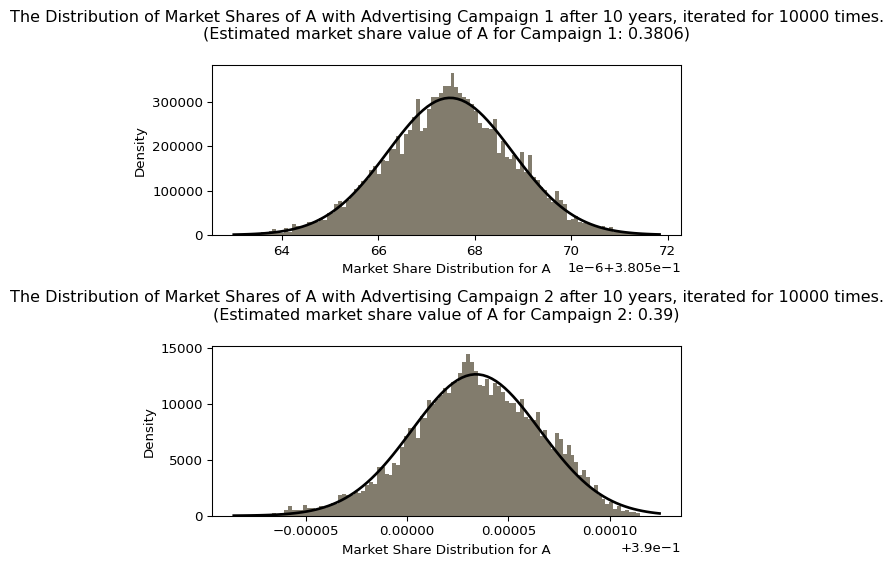

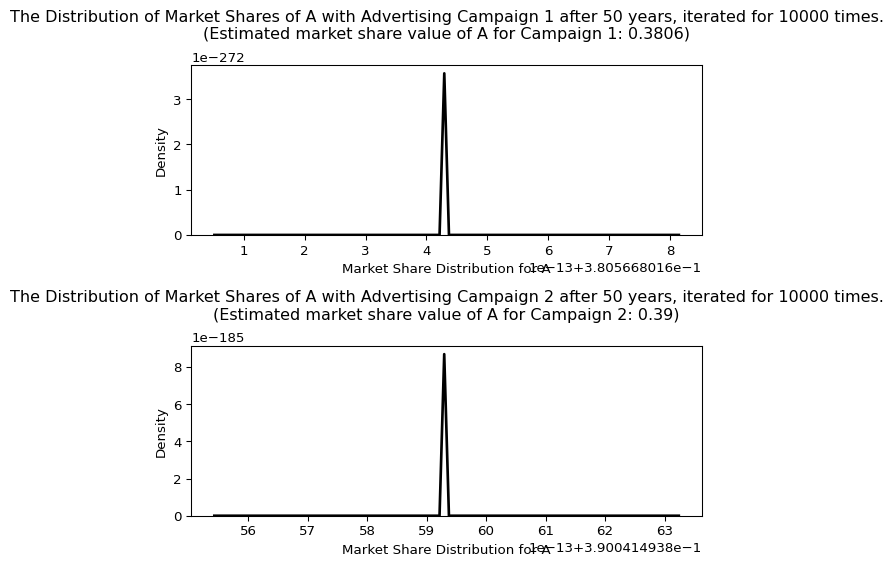

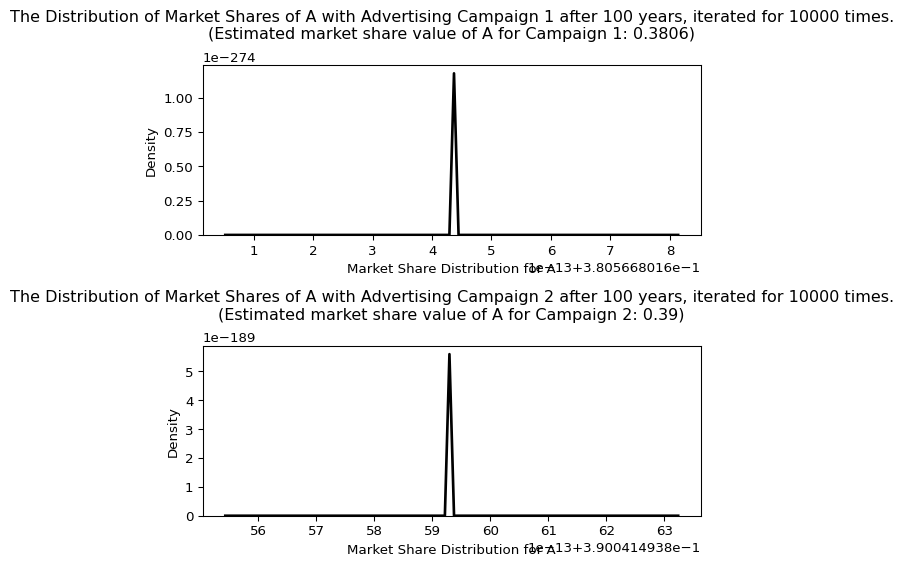

In [4]:
# Code in the advertising campaign transition matrices.
transition1 = np.array([[0.5, 0.32, 0.3], [0.2, 0.48, 0.1], [0.3, 0.2, 0.6]])
transition2 = np.array([[0.5, 0.2, 0.42], [0.2, 0.6, 0.1], [0.3, 0.2, 0.48]])

# Let us iterate over random distribution vectors for the two transition matrices
# to view the resulting market shares after 3 years, 50 years, and 100 years.
np.random.seed(10)
runs = 10000

# I am defining a function that takes in the two transition matrices and the
# number of years to iterate and outputs Gaussian fits for the shares for A
def advertisingGaussian(runs, years, transitionMatrix1, transitionMatrix2):
  resultForAFrom1 = []
  resultForAFrom2 = []
  for run in range(runs):
    # We do experiment a total of variable "runs" times.
    # Create random initial distribution vector for the intial market share.
    mold = np.random.random((3,))
    initialState = mold / mold.sum()

    state = initialState
    # Now we do the actual iteration for the two matrices and append the results.
    for year in range(years):
      state = transition1.dot(state)
    resultForAFrom1.append(state[0])

    state = initialState
    for year in range(years):
      state = transition2.dot(state)
    resultForAFrom2.append(state[0])

  # Now we can fit the two sets of data for the market share of A
  fig, axs = plt.subplots(2, 1, figsize=(6, 6))

  # Determine the random color of the histograms
  randomColorNumber = np.random.rand(3,)


  # Fitting the 1 results
  mu1, sigma1 = norm.fit(resultForAFrom1)

  # Plotting the advertising campaign 1 results
  axs[0].hist(resultForAFrom1, bins=100, density=True, alpha=0.7, color=randomColorNumber)
  axs[0].set_title(f'The Distribution of Market Shares of A with Advertising Campaign 1 after {years} years, iterated for {runs} times.\n(Estimated market share value of A for Campaign 1: {np.round(mu1, decimals=4)})', pad=20)
  axs[0].set_xlabel('Market Share Distribution for A')
  axs[0].set_ylabel('Density')

  xmin1, xmax1 = axs[0].get_xlim()
  x1 = np.linspace(xmin1, xmax1, 100)
  p1 = norm.pdf(x1, mu1, sigma1)
  axs[0].plot(x1, p1, 'k', linewidth=2, label='Gaussian Fit')


  # Fitting the 2 results
  mu2, sigma2 = norm.fit(resultForAFrom2)

  # Plotting the advertising campaign 2 results
  axs[1].hist(resultForAFrom2, bins=100, density=True, alpha=0.7, color=randomColorNumber)
  axs[1].set_title(f'The Distribution of Market Shares of A with Advertising Campaign 2 after {years} years, iterated for {runs} times.\n(Estimated market share value of A for Campaign 2: {np.round(mu2, decimals=4)})', pad=20)
  axs[1].set_xlabel('Market Share Distribution for A')
  axs[1].set_ylabel('Density')

  xmin2, xmax2 = axs[1].get_xlim()
  x2 = np.linspace(xmin2, xmax2, 100)
  p2 = norm.pdf(x2, mu2, sigma2)
  axs[1].plot(x2, p2, 'k', linewidth=2, label='Gaussian Fit')

  # Showing the plot
  plt.tight_layout()
  plt.show()

# Now call the function

advertisingGaussian(runs, 3, transition1, transition2)
print("\n")
advertisingGaussian(runs, 10, transition1, transition2)
print("\n")
advertisingGaussian(runs, 50, transition1, transition2)
print("\n")
advertisingGaussian(runs, 100, transition1, transition2)

Let us analyze these results. Each pair of histogram denotes the
distribution of the market shares for A after some years. The estimated
market share values after the set amount of years is denoted under the
title. This estimated value is the mu parameter for the Gaussian fit,
denoting the value with the greatest probabiltiy distribution.

For Advertising Campaign 1, we see that for 1000 random initial
distributions of market shares will tend with each iteration towards a
stationary state of 0.38 for the market share of A. This suggests that
Advertising Campaign 1 will allow A to stabilize at 0.3806 marketshares.
This seems to be a very good strategy.

For Advertising Campaign 2, we can see that the most probable market
share distribution for also increases. With long iterations under
numerous random intial states, A seems to always achieve the stationary
state of 0.39 for its market share.

Even after three years, markov simulation suggests that Advertising
Campaign 2 performs better than Advertising Campaign 1, as the market
share of A under Advertising Campaign 2 is bigger than the market share
of A under Advertising Campaign 1. The later iterations also suggests
the same thing. Therefore, my model suggests that Advertising Campaign 2
is a more effective choice both for long term and short term increase in
market share for A.

I agree with these conclusions.  
  
Can you discuss why these results had to happen, given the specific
transition matrices you had? For instance, you are multiplying by the
same matrices many times. What do you see if you simply look at the
matrix exponents?  
  
Also: there seems to be a problem with the histograms I see after 50 and
100 years. What’s going on? Did you see this on your end? Is there
something else you could do to represent these data better?

It is important to note the limitations within this model. First, it
simplifies the dynamics of the market. By iterating the static
transition matrices over long periods of time, we are assuming that the
market does not change. In other words, company B and company C are
doing nothing to regain their lost customers. After all, it is quite
unreasonable to assume that things will always stay the same in 100
years. The effectiveness of the advertising campaign also can change,
which is not reflected in the static transition matrices. Therefore,
this model may be effect in approximating the effects of the advertising
campaigns for a very short period of iteration before competitors B and
C have a chance to react or implement their own strategies.

Now, perhaps we wish to go a step further and analyze how much of an
effect gaining shares from B or C will have on the long term share of A.
Then, we can simply construct functions of A market share with respect
to the gaining of the market share of B or C.

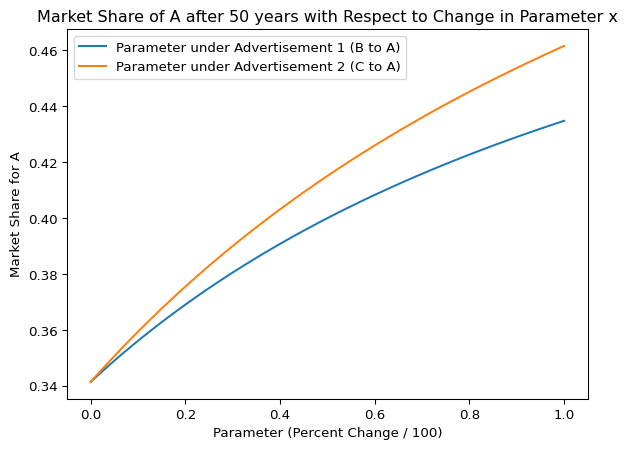

In [5]:
# The variable parameter will be a number between 0 and 1, denoting up till
# 100% of the customer that was suppose to remain with B going to A
# Iterations will control how many years passes.
def functionB(parameter, iterations, initialState):
  change = parameter * 0.4
  transitionMatrix = np.array([[0.5, 0.2 + change, 0.3], [0.2, 0.6 - change, 0.1], [0.3, 0.2, 0.6]])
  # We will start with the assumption for equal shares.
  for year in range(iterations):
    initialState = transitionMatrix.dot(initialState)
  return initialState[0]

def functionC(parameter, iterations, initialState):
  change = parameter * 0.4
  transitionMatrix = np.array([[0.5, 0.2, 0.3 + change], [0.2, 0.6, 0.1], [0.3, 0.2, 0.6 - change]])
  # We will start with the assumption for equal shares
  for year in range(iterations):
    initialState = transitionMatrix.dot(initialState)
  return initialState[0]

# Setting the initial state to be all companies having equal shares
initialState = np.ones((3,1)) / 3

# Readying the plot
xValues = np.linspace(0,1, num=101)
BValues = []
CValues = []

for x in xValues:
  BValues.append(functionB(x, 50, initialState))
  CValues.append(functionC(x, 50, initialState))

# Plotting
plt.title("Market Share of A after 50 years with Respect to Change in Parameter x")
plt.plot(xValues, BValues, label="Parameter under Advertisement 1 (B to A)")
plt.plot(xValues, CValues, label="Parameter under Advertisement 2 (C to A)")
plt.xlabel("Parameter (Percent Change / 100)")
plt.ylabel("Market Share for A")
plt.legend(loc="upper left", frameon=True)

The above graph works is generated by the following method. We introduce
the parameter variable that ranges from 0 to 1. For each transition
matrix representing the advertisement matrix, the parameter looks at the
percentage of customers going to A rather than staying in B/C from the
effects of the campaign and multiplies it by the parameter. For example,
if the parameter is 1, than for Advertisement 1, 100% of the customers
that was originally going to stay with B will go to A, resulting in the
following transition matrix: $\begin{bmatrix}
0.5 & 0.8 & 0.3\\
0.2 & 0.0 & 0.1\\
0.3 & 0.2 & 0.6\\
\end{bmatrix}$.

I love this - it’s a very concrete example which makes it very clear
what you are doing.

Now, with the modified transition matrix by the parameter, the initial
state of all companies having equal shares

is initialized. We apply the initial state to the modified transition
matrix for 50 times. The resulting market share value of A is then
recorded and plotted.

Looking at the graph, if the resources needed to convert customers from
C to A is the same as the resources needed to convert customers from B
to A, then it is more effective to convert customers from C since the
increase in the market share of A is more for C than B as we increase
the parameter.

This is nicely done and very clear overall. I think you could push a
little more on the *why*; why does Campaign 2 work better, how can you
tell just from looking at the transition matrix?

Grade: E

# *Sports Ranking*

We will first rank the teams based on their win-loss ratio. This will be
the simplest way to rank them. In fact, we can create a digraph with the
given edges before doing so. This allows us to create an adjacency
matrix. The sum of the $i^{th}$ row of the matrix gives us the number of
wins for team $i$, while the sum of the $i^{th}$ column of the matrix
gives us the number of losses for team $i$. Therefore, to account for
both wins and losses of each team, we can create a ranking score for
each team determined by their number of wins subtracted by their number
of losses. Using the adjacency matrix of the graph we created makes our
life a lot easier, so I am introducing the graph before the simple
ranking.

Not really important, but what you do isn’t actually a win-loss
**ratio**…

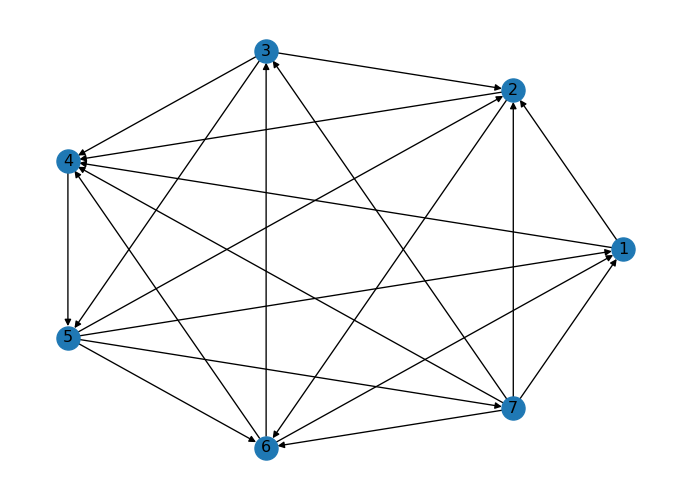



Simple ranking of the teams based on win/loss:
1: Team 7 with a win - loss score of 4.0
2: Team 5 with a win - loss score of 2.0
3: Team 3 with a win - loss score of 1.0
4: Team 6 with a win - loss score of 0.0
5: Team 1 with a win - loss score of -1.0
6: Team 2 with a win - loss score of -2.0
7: Team 4 with a win - loss score of -4.0

In [6]:
sportsGraph = nx.DiGraph()

sportsGraph.add_nodes_from([1, 2, 3, 4, 5, 6, 7])

edges = [

    (1, 2), (7, 3), (2, 4), (4, 5), (3, 2), (5, 1), (6, 1), (7, 2), (2, 6),

    (3, 4), (7, 4), (5, 7), (6, 4), (3, 5), (5, 6), (7, 1), (5, 2), (7, 6),

    (1, 4), (6, 3)

]

sportsGraph.add_edges_from(edges)

# Let us plot the graph representing the wins and losses of the 7 teams.
nx.draw_circular(sportsGraph, with_labels=True)
plt.show()

# To calculate the win-losses for the teams, we can do it by hand, but it is easier to analyze the adjacency matrix of the graph.
adj_matrix = nx.adjacency_matrix(sportsGraph)
adj_matrix = adj_matrix.toarray()

# Define the win and loss arrays, where the index+1 denotes the team number:
wins = np.zeros(7)
losses = np.zeros(7)

# The ith column of the adjacency matrix is the number of losses team i experienced. The ith row is the number of wins team i experienced.
for i in range(len(wins)):
  wins[i] = adj_matrix[i,:].sum()

for i in range(len(losses)):
  losses[i] = adj_matrix[:, i].sum()

# We define a very simple score that takes into account the number of wins and the number of losses for each team. The higher the winLossScore, the better the ranking.
winLossScore = wins - losses

simpleSort = np.argsort(winLossScore)[::-1]
wLSorted = np.sort(winLossScore)[::-1]

print("\n")
print("Simple ranking of the teams based on win/loss:")

for i in range(len(simpleSort)):
  print(f"{i+1}: Team {simpleSort[i] + 1} with a win - loss score of {wLSorted[i]}")

We can see that the win-loss score gives us fairly neat ranking.
Although we didn’t see the same scores on different teams, we can
account for it by developing a system. If two teams have the same score,
then we look at their total wins. The team with the most wins will be
ranked higher. If they have the same wins, they have to have the same
losses (since they have the same win-loss score). In this case, we will
have to devise more sophisticated methods for ranking. This is what we
do next. We will use the vertex power to rank the teams. Remember, the
vertex power is the number of connections of a vertex with length two of
less. This allows us to sort of consider the “weight” of the team wins.
If team 1 wins team 2, and team 2 wins team 3, then we consider team 1
to be better than team 3 and count that as a “win” for team 1 (lucky!)

I’m not sure what you mean by this: ” If they have the same wins, they
have to have the same losses (since they have the same win-loss score).
In this case, we will have to devise more sophisticated methods for
ranking. ”

Then, we can rank the teams based on this power concept. The team with
the highest power will be first place.

In [7]:
# Next, we use the vertex power to rank

# Calculate the power matrix
powerMatrix = adj_matrix + adj_matrix.dot(adj_matrix)

# This will include all values for the powers of each team i (index)
powers = np.zeros(7)

for i in range(len(powers)):
  powers[i] = powerMatrix[i, :].sum()

# Now, sort the powers
powerSort = np.argsort(powers)[::-1]
powersSorted = np.sort(powers)[::-1]

# Printing the sort
print("Power Ranking of the teams")
for i in range(len(powerSort)):
  print(f"{i+1}: Team {powerSort[i] + 1} with a power value of {powersSorted[i]}")

Power Ranking of the teams
1: Team 7 with a power value of 16.0
2: Team 5 with a power value of 16.0
3: Team 3 with a power value of 10.0
4: Team 6 with a power value of 9.0
5: Team 2 with a power value of 6.0
6: Team 4 with a power value of 5.0
7: Team 1 with a power value of 5.0

We can see that, compared to the simple ranking based on win-loss
scores, the power ranking has all of the places the same except for a
switch in the place of team 1, 2, 4. This is interesting. This means
that although team 2 has a lower win-loss score than team 1, it has a
higher power than team 1. We also note that the power ranking is not
satisfactory, as there are two pairs of teams (7 and 5, 4 and 1) that
has the same power.

Why does Team 2 have a higher power than Team 1? Can you explain it
concretely in terms of games that it won?

Therefore, we should go further and try the Reverse PageRank method.
Remember that the Reverse PageRank uses the adjoint of our original
adjacency matrix. So, instead of the original PageRank ranking pages
based on ingoing links, we now rank based on outgoing links. In our
context, this is what we wish, since the outgoing links from team 1 to
team 2 means that team 1 won over team 2. Also, Reverse PageRank
involves the inclusion of a teleportation vector. This teleportation
vector in this context allows us to encode in some “luck” parameter to
all of the teams. Maybe team 1 won team 2 because a member in team 2 had
a stomache. The teleportation vector then represents a global correction
to the weighing of all wins.

The “luck” idea is an interesting way of describing the teleportation
vector; I hadn’t thought of it like this before. I think you could dig
in a bit: it gives a little bit of weight to the worldview that the
teams really are equally good, and that the observed wins and losses
were just due to luck. I think you could

Now, let’s do the reverse pagerank.

In [8]:
transitionMatrix = np.zeros(np.shape(adj_matrix))

# Since we are doing the transpose of the adjacent matrix, we can do a small
# shortcut and simply normalize the column vectors of the adjacement matrix.
# This is because the transition matrix is the "normalized" transpose of the
# adjacent matrix. We start with the transpose of the adjacent matrix. So this
# ends up canceling out.
for j in range(np.shape(adj_matrix)[1]):
  sumBuffer = 0
  for i in range(np.shape(adj_matrix)[0]):
    sumBuffer += adj_matrix[i,j]
  for m in range(np.shape(adj_matrix)[0]):
    if adj_matrix[m,j] > 0:
      transitionMatrix[m,j] = adj_matrix[m,j] / sumBuffer

# Now, we solve the PageRank equation with our obtained transitionMatrix
alpha = 0.85

matrixToSolve = np.eye(7) - alpha * transitionMatrix
inverse = np.linalg.inv(matrixToSolve)
oneMinusAlphaV = (1 - alpha) * (1/7 * np.ones((7,1)))
answer = inverse.dot(oneMinusAlphaV)

#Now we sort the values based on descending order
reverseIndex = np.argsort(answer, axis=0).flatten()[::-1]
reverseSort = np.sort(answer, axis=0).flatten()[::-1]

#Printing the results
print("The ReversePage Algorithm Ranking: ")
for i in range(len(answer)):
  print(f"{i+1}: Team {reverseIndex[i] + 1} with the value of {np.round(reverseSort[i], decimals=2)}")

The ReversePage Algorithm Ranking: 
1: Team 5 with the value of 0.25
2: Team 7 with the value of 0.18
3: Team 3 with the value of 0.17
4: Team 6 with the value of 0.13
5: Team 4 with the value of 0.13
6: Team 2 with the value of 0.08
7: Team 1 with the value of 0.06

Let us think about the results of this ReversePage compared to the power
ranking. We can see now that when we consider the “stable state”, which
is what we determine to be the ranking, Team 5 has higher “ranking
score” than Team 7. This suggests that even though Team 5 and Team 7
have the same power, the influence, or the “quality” of the wins for
Team 5 is higher than Team 7.

I really want to see the *why* here! In English, why is the quality of
the wins for Team 5 higher than Team 7?

Another interesting result to recognize is the change in the ranking
place for Team 4 and Team 6. Even though the “quality” of their wins are
the same, the power, or the amount of their wins differ.

Now, let us add actual weights to the wins with M.

In [9]:
M = [4, 8, 7, 3, 7, 23, 15, 6, 18, 13, 14, 7, 13, 7, 18, 45, 10, 19, 14, 13]

# Administer the weighing
index = 0
newMatrix = np.zeros(np.shape(adj_matrix))
for coordinate in edges:
  newMatrix[coordinate[0] - 1, coordinate[1] - 1] = adj_matrix[coordinate[0] - 1, coordinate[1] - 1] * M[index]
  index += 1

# Calculate the new power matrix
newPowerMatrix = newMatrix + newMatrix.dot(newMatrix)

# This will include all values for the powers of each team i (index)
newPower = np.zeros(7)

for i in range(len(newPower)):
  newPower[i] = newPowerMatrix[i, :].sum()

# Now, sort the powers
newPowerSort = np.argsort(newPower)[::-1]
newPowersSorted = np.sort(newPower)[::-1]

# Printing the sort
print("Power ranking with added weighing: ")
for i in range(len(newPowerSort)):
  print(f"{i+1}: Team {newPowerSort[i] + 1} with a power value of {newPowersSorted[i]}")

Power ranking with added weighing: 
1: Team 5 with a power value of 2104.0
2: Team 7 with a power value of 2089.0
3: Team 2 with a power value of 784.0
4: Team 6 with a power value of 701.0
5: Team 3 with a power value of 647.0
6: Team 4 with a power value of 177.0
7: Team 1 with a power value of 160.0

The higher the power value for the teams, we can assume that the
significance of their win is larger. This means that we know although
team 5 had less wins than team 7, team 5’s wins were just so much more
rewarding and meaningful. The same could be said with the other teams.

You’ve done a nice job here, clearly explaining what you did and
formatting the output nicely. All that’s missing to make this an E grade
is an intuitive explanation in English of why the different algorithms
are giving different results in a few specific cases.

  
Grade: M

# *LU Factorization*

Let us construct the Gaussian Elimination Algorithm and record all row
exchanges with an index array. The overall idea is as follows: For a
given matrix A, we first look at the first column of A and find the
first nonzero component for this column vector. If this is not the first
row of the column vector, we swap it with the first row of the column
vector and record this swap with the index array. Then, we find all of
the necessary LU factorization factors needed to make the row values of
the column vector below 0, recording the multipliers in an identity
matrix. Then, we move on to the 2nd column vector of A and do the same
thing.

In [10]:
def PLUSystemSolver(matrix):
  # Converting to Numpy array
  matrix = np.array(matrix)
  matrixSize = np.shape(matrix)

  # Define the row index vector
  rowIndexArray = np.array(range(0, matrixSize[0]))

  # Defining the mold for the lower triangular matrix L
  L = np.eye(matrixSize[0])

  # Due to the construction of the algorthm below, we need to temporary save all of the multipliers and its corresponding
  # coordinate in the L matrix. This is because we have potential row switches, which will mess the row orders up.
  multiplierSave = []
  coordinateSave = []

  # Now let the algorthm begin
  # We need to iterate over all column vectors
  for columnIndex in range(matrixSize[1] - 1):
    # For each column vector, iterate over the row components starting from the rowIndex as the columnIndex (indicating the diagonal)
    for rowIndexSub in range(columnIndex, matrixSize[0]):
      # Checking for nonzero "pivots"
      if (np.absolute(matrix[rowIndexArray[rowIndexSub], columnIndex]) > 0):
        # Swapping the first nonzero pivot. DON'T SWITCH THE ACTUAL ROWS
        rowIndexArray[rowIndexArray[columnIndex]], rowIndexArray[rowIndexSub] = rowIndexArray[rowIndexSub], rowIndexArray[rowIndexArray[columnIndex]]
        break
    # Now we do the subtraction algorthm on the column. Defining the value to subtract others.
    pivotVal = matrix[rowIndexArray[columnIndex], columnIndex]
    # We first make sure that the column index is not out of bounds (it is not the last column vector)
    if columnIndex != (matrixSize[1] - 1):
      for rowIndexSub in range(columnIndex + 1, matrixSize[0]):
        # If the iterated value is nonzero, we do the subtraction
        currentVal = matrix[rowIndexArray[rowIndexSub], columnIndex]
        # Then we do the subtraction and find the multipliers
        if currentVal != 0:
          multiplier = (currentVal / pivotVal)
          # Subtracting
          matrix[rowIndexArray[rowIndexSub]] = matrix[rowIndexArray[rowIndexSub]] - (matrix[rowIndexArray[columnIndex]] * (multiplier))
          # Recording the values of the multiplier and coordinates
          coordinateSave.append([rowIndexSub, columnIndex])
          multiplierSave.append(multiplier)
  # Now we input the multipliers to the correct positions
  for i in range(len(coordinateSave)):
    L[rowIndexArray[coordinateSave[i][0]], coordinateSave[i][1]] = multiplierSave[i]

  # Construction the Permutation Matrix
  P = np.zeros(np.shape(matrix))
  for i in range(len(rowIndexArray)):
    mold = np.zeros(np.shape(matrix)[1])
    mold[[rowIndexArray[i]]] = 1
    P[[i]] = mold

  # Finally, we switch the row position for U
  matrixCopy = np.copy(matrix)
  for i in range(matrixSize[0]):
    matrix[[i]] = matrixCopy[[rowIndexArray[i]]]

  # Returning the output
  return P, L, matrix

# Testing
A = np.array([[2, 1, 0], [-4, -1, -1], [2, 3, -3]])
A2 = np.array([[2, 1, 3],[-4, -2, -1],[2, 3, -3]])
B1 = PLUSystemSolver(A)
B2 = PLUSystemSolver(A2)

print("Starting Matrix: \n", A)
print("P Matrix: \n", B1[0])
print("L Matrix: \n", B1[1])
print("U Matrix: \n", B1[2])
print("\n")
print("Starting Matrix: \n", A2)
print("P Matrix: \n", B2[0])
print("L Matrix: \n", B2[1])
print("U Matrix: \n", B2[2])

Starting Matrix: 
 [[ 2  1  0]
 [-4 -1 -1]
 [ 2  3 -3]]
P Matrix: 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
L Matrix: 
 [[ 1.  0.  0.]
 [-2.  1.  0.]
 [ 1.  2.  1.]]
U Matrix: 
 [[ 2  1  0]
 [ 0  1 -1]
 [ 0  0 -1]]


Starting Matrix: 
 [[ 2  1  3]
 [-4 -2 -1]
 [ 2  3 -3]]
P Matrix: 
 [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
L Matrix: 
 [[ 1.  0.  0.]
 [ 1.  1.  0.]
 [-2.  0.  1.]]
U Matrix: 
 [[ 2  1  3]
 [ 0  2 -6]
 [ 0  0  5]]

We have successfully implemented the PLU function. This function takes
the matrix in question and returns a tuple of (P matrix, L matrix, U
matrix). We can see its success in finding the PLU matrices for HW3
Problem 12 and Problem 13.

I’d like to see more on the testing and the outputs here. How do we know
that the product of the PLU matrices really is the starting matrix? How
do we know that U and L are really upper and lower diagonal? (We can see
this by eye, but you could say so, or you could test for it.)  
  
Is it possible that your algorithm fails on a matrix that is different
from these two?

Now, let us implement the module that uses this PLU function to solve
general linear systems. We will assume that the diagonals for the upper
triangular and lower triangular matrices are nonzero. This systemSolver
algorithm will take in the square nonsingular matrix and b in the form
of a list with the correct dimension (3 numbers in a list for a 3 by 3
nonsingular square matrix).

In [11]:
# Let us first define an upper triangular system solver.
# b will be a one dimensional array.
def upperSolve(matrix, b):
  # We are assuming that the matrix input is an upper triangular matrix.
  # The matrix has to be square, so the size we can just get a single number.
  matrixSize = np.shape(matrix)[0]
  # Construct an empty solution vector
  solution = np.zeros(matrixSize)

  # We iterate in the reverse order on the rows
  for rowIndex in reversed(range(matrixSize)):
    # The value pointer is the value of the diagonal.
    valuePointer = matrix[rowIndex, rowIndex]
    if rowIndex == matrixSize - 1:
      solution[matrixSize - 1] = b[matrixSize - 1] / valuePointer
      continue

    solution[rowIndex] = b[rowIndex] / matrix[rowIndex, rowIndex]
    for index in range(rowIndex + 1, matrixSize):
      solution[rowIndex] -= matrix[rowIndex, index] * solution[index] / matrix[rowIndex, rowIndex]

  return solution

def lowerSolve(matrix, b):
  # This will be similar to the upperSolve algorithm
  # We are assuming that the matrix input is an upper triangular matrix.
  # The matrix has to be square, so the size we can just get a single number.
  matrixSize = np.shape(matrix)[0]
  # Construct an empty solution vector
  solution = np.zeros(matrixSize)

  # We iterate in the reverse order on the rows
  for rowIndex in range(matrixSize):
    # The value pointer is the value of the diagonal.
    valuePointer = matrix[rowIndex, rowIndex]
    if rowIndex == 0:
      solution[0] = b[0] / valuePointer
      continue

    solution[rowIndex] = b[rowIndex] / matrix[rowIndex, rowIndex]
    for index in (range(0, rowIndex)):
      solution[rowIndex] -= matrix[rowIndex, index] * solution[index] / matrix[rowIndex, rowIndex]

  return solution

# After defining the triangular solvers, we can carry on solving the entire system.
def systemSolver(P, L, U, b):
  matrixSize = np.shape(U)

  # We have (P^-1)LUx = b, so we should first solve for z, where (P^-1)z = b.
  z = np.linalg.solve(P, b)

  # Then, we have z = LUx. So let y = Ux. Then Ly = z is a system and we solve for y.
  y = lowerSolve(L, z)

  # Finally, we have Ux = y.
  x = upperSolve(U, y)

  return x

The Linear System solver utilizing PLU factorization has been
implemented. To test the accuracy of the algorithm, we can generate
random matrices with random solutions.

In [12]:
# From ChatGBT
def generate_random_nonsingular_matrix(n):
    while True:
        A = np.random.rand(n, n)  # Generate a random n x n matrix
        if np.linalg.det(A) != 0:  # Check if the determinant is non-zero
            return A

# Let us time this test. You will see the point soon!
import time

start = time.perf_counter()
matrixCreationTime = 0

# Now let us test it
trueTimes = 0
falseTimes = 0

# Testing for 10000 times
for i in range(10000):
  # Generating random 1 x 10 vector for b and 10 * 10 nonsingular matrices
  random = np.random.uniform(0, 100000, size=10)

  # I am also timing how long the matrix creation and PLU calculation is
  start_1 = time.perf_counter()
  randomSquare = generate_random_nonsingular_matrix(10)
  end_1 = time.perf_counter()

  P, L, U = PLUSystemSolver(randomSquare)

  matrixCreationTime += end_1 - start_1

  # Test case
  if systemSolver(P, L, U, random).all() == np.linalg.solve(randomSquare, random).all():
    trueTimes += 1
  else:
    falseTimes = 0
    print(randomSquare, random)

print("Number of Times the Algorithm is Correct: ", trueTimes)
print("Number of Times the Algorithm is Incorrect: ", falseTimes)

end = time.perf_counter()
duration = end - start
print(f"The total test took {duration:.6f} seconds. \n The matrix creation took a total of {matrixCreationTime:.6f} seconds.")
print(f"Test time subtracted by matrix creation time is {duration - matrixCreationTime:.6f}")

Number of Times the Algorithm is Correct:  10000
Number of Times the Algorithm is Incorrect:  0
The total test took 2.954038 seconds. 
 The matrix creation took a total of 0.067714 seconds.
Test time subtracted by matrix creation time is 2.886325

We see from the results of the test. After generating 10000 random 1 x
10 vectors for b and 10 \* 10 nonsingular matrices, the algorithm always
matches the linalg solution. We can conclude with confidence that our
algorithm works well.

I’m quite surprised that your algorithm *exactly* matches the linag one;
I would have thought you’d need to allow for some rounding error. Neat!

Let us try something. Instead of creating a random matrix everytime, let
us just use the same matrix. Everything else is the same.

In [13]:
trueTimes = 0
falseTimes = 0
randomSquare = generate_random_nonsingular_matrix(10)
P, L, U = PLUSystemSolver(randomSquare)

start = time.perf_counter()
# Testing for 10000 times
for i in range(10000):
  # Generating random 1 x 10 vector for b and 10 * 10 nonsingular matrices
  random = np.random.uniform(0, 100000, size=10)

  # Keeping the time counters to keep the timing same as last block's test.
  start_1 = time.perf_counter()
  end_1 = time.perf_counter()
  matrixCreationTime += end_1 - start_1

  # Test case
  if systemSolver(P, L, U, random).all() == np.linalg.solve(randomSquare, random).all():
    trueTimes += 1
  else:
    falseTimes = 0
    print(randomSquare, random)

print("Number of Times the Algorithm is Correct: ", trueTimes)
print("Number of Times the Algorithm is Incorrect: ", falseTimes)

end = time.perf_counter()
duration = end - start
print(f"The test took {duration:.6f} seconds.")

Number of Times the Algorithm is Correct:  10000
Number of Times the Algorithm is Incorrect:  0
The test took 0.876102 seconds.

The difference in the times of these tests is noticeable. The second
test, which only calculates P, L, U once is noticeably faster than the
first test. My hypothesis was that the second test where we did not
create random matrices everytime and used the same matrix could be
noticeably shorter. This makes sense, as the advantage of PLU is the
fact that once we have PLU, we quickly calculate the solutions
corresponding to PLU for any b.

This is awesome.

Now, we can create our final inverse matrix finder module! The
inverseFinder takes in nonsingular square matrices and output the
inverse :)

In [14]:
def inverseFinder(matrix):
  matrixSize = np.shape(matrix)[0]
  # First, let us generate the standard coordinate basis that will serve as the
  # b values to the system
  bSet = []
  for i in range(matrixSize):
    e = np.zeros(matrixSize)
    e[i] = 1
    bSet.append(e)

  P, L, U = PLUSystemSolver(matrix)

  # Now we can obtain the solutino set
  solutionSet = []
  for b in bSet:
    solutionSet.append(systemSolver(P, L, U, b))

  transpose = np.array(solutionSet)
  answer = transpose.T
  return answer

# Simple test
print(inverseFinder(A))
print(np.linalg.inv(A))

[[-3.  -1.5  0.5]
 [ 7.   3.  -1. ]
 [ 5.   2.  -1. ]]
[[-3.  -1.5  0.5]
 [ 7.   3.  -1. ]
 [ 5.   2.  -1. ]]

Yay, the inverse finder is finished. Similar to the systemSolver
algorithm, let us test it more extensively by generating random
nonsingular square matrices.

In [15]:
trueTimes = 0
falseTimes = 0

# Testing for 10000 times
for i in range(10000):
  # Generating random 1 x 10 vector for b and 10 * 10 nonsingular matrices
  randomSquare = generate_random_nonsingular_matrix(10)
  # Test case
  if np.linalg.inv(randomSquare).all() != None:
    if inverseFinder(randomSquare).all() == np.linalg.inv(randomSquare).all():
      trueTimes += 1
    else:
      falseTimes = 0
  else:
    print(randomSquare)

print("Number of Times the Algorithm is Correct: ", trueTimes)
print("Number of Times the Algorithm is Incorrect: ", falseTimes)

Number of Times the Algorithm is Correct:  10000
Number of Times the Algorithm is Incorrect:  0

This code will take a little while to run. But after it finishes, we see
that the inverseFinder algorithm works very well! There is no time when
the algorithm is wrong during this test. It is important to note the
limitations of the algorithm systemSolver and inverseFInder as they can
only take square nonsingular matrices. In other words, matrices with a
nonzero determinant. However, this is expected as the inverse can only
be found for matrices with zero determinant. Therefore, the only big
limitation will be for systemSolver. We cannot use this algorithm to
solve singular matrices or matrix systems with infinite solutions.
However, it is also important to note the strength of these algorithms.
It uses a relatively clear and straigtforward process to find the system
solution and the inverses. Once the PLU matrices are found, the
solutions for the linear system corresponding to PLU for any b can be
found with small computing power.

This is excellent. You’ve created the algorithms and tested them well,
including cleverly measuring the effects of using the decomposition for
repeated solving. Great work.

Grade: E